Original shape: (2500, 8968), After variance filter: (2500, 2533)
After TruncatedSVD shape: (2500, 2)
Explained variance ratio (first 10): [0.00621389 0.0118474 ]
Total explained variance (2 comps): 0.018061288295844677
2D PCA variance explained: 1.0


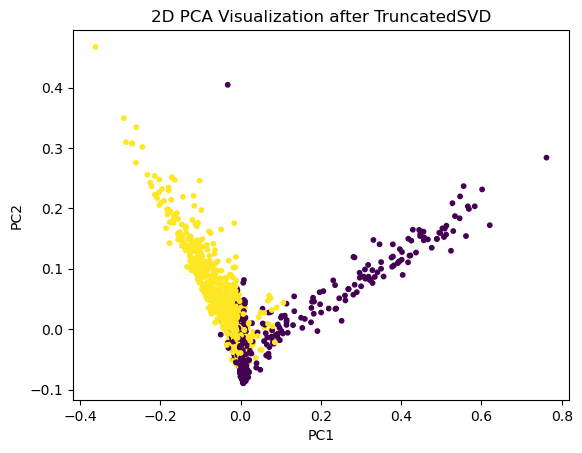

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Read data
df = pd.read_csv("tfidf_features.csv")
df_hydrogen = pd.read_csv("hydrogen.csv")

# Add labels
df["label"] = df_hydrogen["label"]

# Encode labels
le = LabelEncoder()
df["label"] = le.fit_transform(df["label"])

# Separate features and labels
y = df["label"].values
X = df.drop(columns=["label"])

# --- STEP 1: Feature selection: remove near-zero variance features ---
# These are words that almost never appear or appear everywhere.
selector = VarianceThreshold(threshold=0.0001)
X_reduced = selector.fit_transform(X)

print(f"Original shape: {X.shape}, After variance filter: {X_reduced.shape}")

# --- STEP 2: Dimensionality reduction using TruncatedSVD (PCA for sparse TF-IDF) ---
# Start with e.g., 100 components (tune as needed)
svd = TruncatedSVD(n_components=2, random_state=10)
X_svd = svd.fit_transform(X_reduced)

print(f"After TruncatedSVD shape: {X_svd.shape}")
print(f"Explained variance ratio (first 10): {svd.explained_variance_ratio_[:10]}")
print("Total explained variance (2 comps):", svd.explained_variance_ratio_.sum())

# --- STEP 3 (optional): Visualize with 2D PCA ---
# If you want a 2D projection for visualization only:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca_vis = PCA(n_components=2, random_state=10)
X_pca_vis = pca_vis.fit_transform(X_svd)

print("2D PCA variance explained:", pca_vis.explained_variance_ratio_.sum())

# Plot the visualization
plt.scatter(X_pca_vis[:, 0], X_pca_vis[:, 1], c=y, cmap="viridis", s=10)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA Visualization after TruncatedSVD")
plt.show()